<a href="https://colab.research.google.com/github/AngelinaSmi/Digital-image-processing/blob/main/Lb2_DIP_Smirnova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа № 2 Смирновой А.Е. 24ВВИм1**

Задание: реализовать эквализацию из методички

Установим пакет opencv-python

In [11]:
!pip3 install opencv-python

Подключим библиотеки

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Загрузим и выведем изображение

In [13]:
image = cv.imread('./lenna.png')

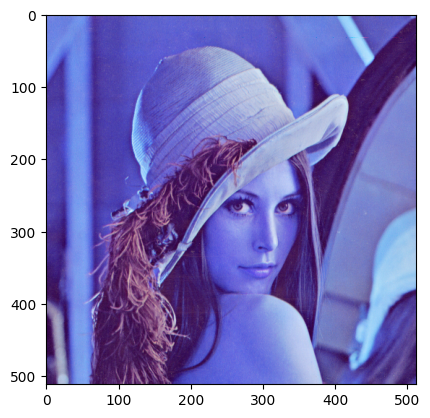

In [14]:
#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image[:,:,:])


Берем изображение в градациях серого для наилучшего отображения распределения яркости

In [16]:
img = cv.imread("lenna.png", cv.IMREAD_GRAYSCALE)

Строим гистограмму (Hist[i] = число пикселей с яркостью i)


In [17]:
hist = np.bincount(img.ravel(), minlength=256)

Считаем кумулятивную сумму (∑ Hist[j] от 0 до i)


In [18]:
cdf = np.cumsum(hist)

Нормализуем по формуле из задания:
LUT[i] = 255 * (сумма гистограммы до i) / (общее число пикселей)

In [19]:
lut = np.round(255 * cdf / cdf[-1]).astype(np.uint8)

Применяем LUT к изображению


In [20]:
equalized = lut[img]

Визуализация


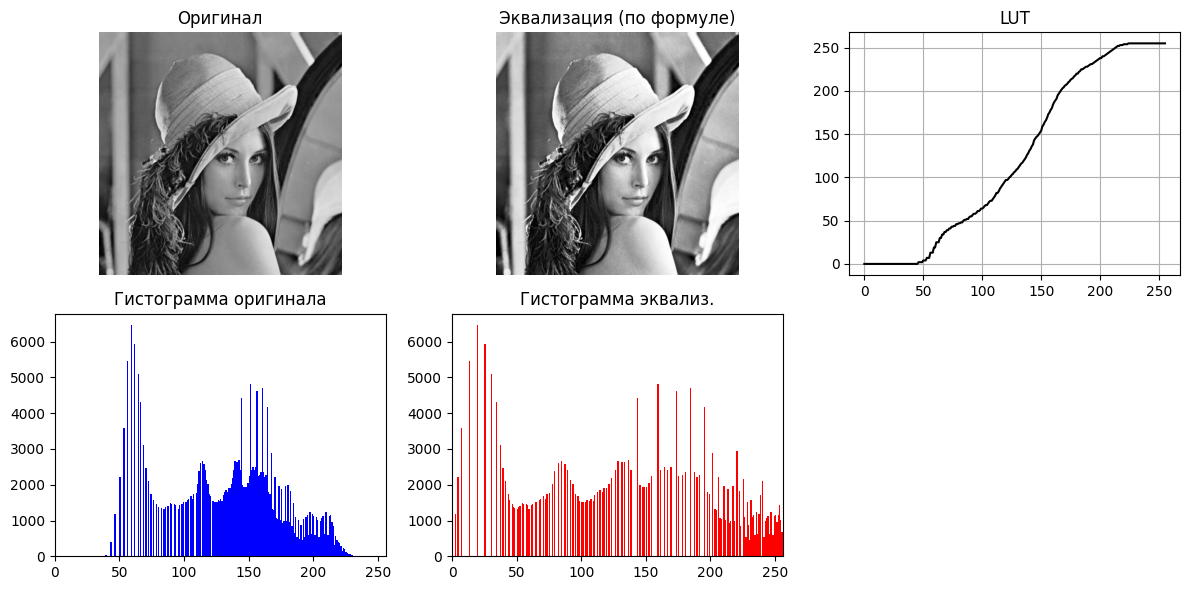

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.title("Оригинал")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Эквализация (по формуле)")
plt.imshow(equalized, cmap="gray")
plt.axis("off")

plt.subplot(2,3,3)
plt.title("LUT")
plt.plot(lut, color="black")
plt.grid(True)

plt.subplot(2,3,4)
plt.title("Гистограмма оригинала")
plt.hist(img.ravel(), bins=256, range=[0,256], color="blue")
plt.xlim([0,256])

plt.subplot(2,3,5)
plt.title("Гистограмма эквализ.")
plt.hist(equalized.ravel(), bins=256, range=[0,256], color="red")
plt.xlim([0,256])

plt.tight_layout()
plt.show()